<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/3_5_%EB%B6%80%EC%8A%A4%ED%8C%85(%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 부스팅 (회귀)

# 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법
# 붓스트랩을 병렬로 수행(각 모델을 독립적으로 구축)하는 배깅과 달리 순차방식으로 학습을 진행함
# 훈련 단계에서 알고리즘은 각 결과 모델에 가중치를 할당하므로 분류 결과가 좋은 데이터는 높은 가중치를, 분류 결과가 좋지 않은 데이터는 낮은 가중치를 할당받아 다음 붓스트래핑에서 추출될 확률이 높아짐

# 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있음

# train 데이터에 과적합할 위험이 있음

In [2]:
# 분류의 경우

# sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate=1.0)

# 회귀의 경우

# sklearn.ensemble.AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate=1.0)

In [4]:
# base_estimator : 부스팅에서 수행할 분류기 (None이면 DecisionTreeClassifier/DecisionTreeRegressor를 수행)
# n_estimators : 부스팅이 종료되는 최대 분류기의 수 (int, default=50)

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/ADP/Part.2/1. 통계분석/data/data/kc_house_data.csv')

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [9]:
df = df.drop(['id','date'], axis=1)

In [10]:
X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [12]:
from sklearn.ensemble import AdaBoostRegressor # Ada 부스팅

reg = AdaBoostRegressor()

reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [13]:
reg.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [14]:
print("train정확도 : ", reg.score(X_train, y_train))
print("test 정확도 : ", reg.score(X_test, y_test))

train정확도 :  0.3587953787111885
test 정확도 :  0.3262864249685923


In [15]:
np.arange(0.01, 0.1, 0.02)

array([0.01, 0.03, 0.05, 0.07, 0.09])

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':np.arange(0.01, 0.1, 0.02)}
model_grid_boost = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
model_grid_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09])})

In [17]:
model_grid_boost.best_estimator_

AdaBoostRegressor(learning_rate=0.049999999999999996)

In [18]:
model_grid_boost.best_estimator_.score(X_train,y_train)

0.6368496656998727

In [19]:
model_grid_boost.best_estimator_.score(X_test,y_test)


0.621136942668163

In [20]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_boost.best_estimator_.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,sqft_living,0.642515
1,grade,0.266694
2,yr_built,0.028741
3,view,0.025209
4,sqft_lot15,0.015924
5,waterfront_river_view,0.005793
6,waterfront_standard,0.005522
7,sqft_basement,0.003230
8,yr_renovated,0.002596
9,sqft_lot,0.001641


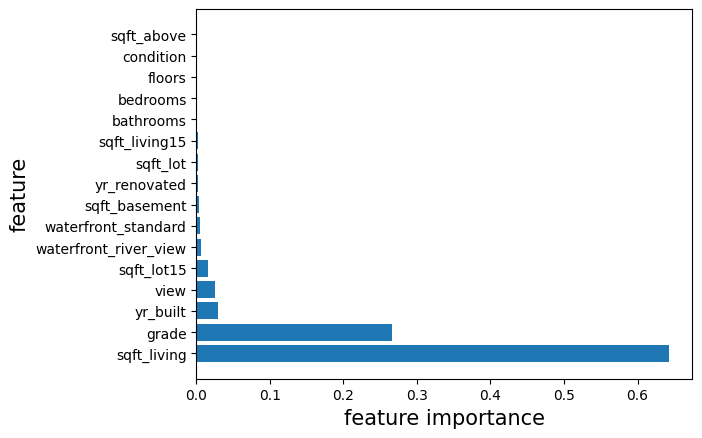

In [21]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()